# Exam II: Python and Web Scraping

### Question 1 <span style = 'font-size:80%'>[4 points]</span>

Add your name to the Markdown cell below, and change the font color of your name to red.

### Name: 
<p style = 'color:Red'>
James Conlin
</p>

### Question 2 <span style = 'font-size:80%'>[6 points]</span>

Write code that assigns the values of 3 and 5.6 to two variables, named *x* and *y*, and then finds the sum of the numbers, and outputs the result in the form: 

```
The sum of 3 and 5.6 is 8.6.
```

In [16]:
x = 3
y = 5.6
print('The sum of',x, 'and',y,'is',(x+y));

The sum of 3 and 5.6 is 8.6


### Intro and setup for Questions 3  - 7

The website https://www.infoplease.com/us/states/state-population-by-rank lists the 50 states ranked by population. The code below uses *BeautifulSoup* to scrape data from this website to create a list of the 50 states. 

In [2]:
from bs4 import BeautifulSoup
import requests

# create the soup
r = requests.get('https://www.infoplease.com/us/states/state-population-by-rank')
soup = BeautifulSoup(r.text)

# get the state table and create a list of states
table = soup.find(id = 'A0922497')
state_trs = table.find_all('tr')

states = []
for tr in state_trs[1:] :
    states.append(tr.find_all('td')[1].text)

The next two questions are Python coding questions based on this list named *states*.

### Question 3 <span style = 'font-size:80%'>[10 points]</span>

Use slicing to print or display the following:
    
(a) The first state in the list

In [3]:
print(states[0])

California


(b) The first 4 states in the list

In [4]:
i = 0
while(i<4) :
    print(states[i])
    i+=1

California
Texas
Florida
New York


(c) Use a *loop* to print out all states that have an 'm' or 'M' in its name. Note: one way to do this is to use *s.lower()* to make a lower-case copy of the string *s*. 

In [5]:
i = 0
while(i<51) :
    if "m" in states[i]:
        print(states[i])
    if "M" in states[i]:
        print(states[i])
    i+=1

Michigan
Massachusetts
Maryland
Missouri
Minnesota
Alabama
Oklahoma
Mississippi
New Mexico
New Hampshire
Maine
Montana
Vermont
Wyoming


### Question 4 <span style = 'font-size:80%'>[6 points]</span>

Use list comprehension to create a new list of states, named *long_states*, that contains only states whose names are more than 10 characters long.

In [6]:
newlist = [x for x in states if len(x) > 10 ] 
print(newlist)

['Pennsylvania', 'North Carolina', 'Massachusetts', 'South Carolina', 'Connecticut', 'Mississippi', 'West Virginia', 'New Hampshire', 'Rhode Island', 'South Dakota', 'North Dakota']


### Question 5 <span style = 'font-size:80%'>[6 points]</span>

Use *BeautifulSoup* to display the text of the second *li* element with the class name of 'we-mega-menu-li'.

In [7]:
li = soup.select('li.we-mega-menu-li.dropdown-menu.show-desktop.main-menu-tools')
li1 = li[0].text.strip()
b = li1.split(' ')
print(b[0])

Tools


Describe where this *li* element is found on the page.

(Type your answer here)

### Question 6 <span style = 'font-size:80%'>[4 points]</span>

Use *BeautifulSoup* to display the text of the first *li* that has a *description* attribute equal to 'Quizzes and Trivia'. In other words, the HTML element has the format:

```
<li ... description = 'Quizzes and Trivia' ... >
```

In [8]:
li = soup.find_all(attrs={"description" : "Quizzes and Trivia"})
li[0].text.strip()

'Quizzes'

### Question 7 <span style = 'font-size:80%'>[4 points]</span>

Use *BeautifulSoup* to find the first *div* on the page and print out its class name.

In [9]:
print(soup.div['class'])

['dialog-off-canvas-main-canvas']


### Question 8 <span style = 'font-size:80%'>[8 points]</span>

Eastern's Wikipedia page can be found at:
https://en.wikipedia.org/wiki/Eastern_Connecticut_State_University

Use the *requests* module and *BeautifulSoup* to answer the questions below:

(a) Find the the main heading (“Eastern Connecticut State University”), which is retreived based on its *id*.

In [10]:
headers = {"User-Agent": "TestBot"}
page = requests.get('https://en.wikipedia.org/wiki/Eastern_Connecticut_State_University', headers = headers)
page
soup = BeautifulSoup(page.content, 'html.parser')
s1 = soup.title.string.split("-")
print(s1[0])

Eastern Connecticut State University 


(b) From the table on the right hand side of the page, extract and print the following:

- the date established
- the total number of students

Note: you can assume that the text for the date established is "Established" and that the text for the total number of students is "Students"; however, you should not assume that these rows will always appear in the same positions in the table (e.g., your code should work if the row for "Established" was the first row).

In [11]:
table = soup.find('table', attrs={'class':'infobox vcard'})
table_body = table.find('tbody')
td = []
th = []
tabletr = table_body.find_all('tr')
for row in tabletr:
    cols = row.find_all('th')
    if not cols:
        th.append('empty')
    else:
        cols = cols[0].text.strip()
        th.append(cols)
    cols = row.find_all('td')
    cols = cols[0].text.strip()
    td.append(cols)
count = 0
while(count <= len(th)):
    if th[count] == 'Established':
        break
    else:
        count+=1
        

print(td[count], 'Year Established')

while(count <= len(th)):
    if th[count] == 'Students':
        break
    else:
        count+=1
student = td[count].split('(')
print(student[0],'Number of Students')

1889 Year Established
4,989  Number of Students


### Question 9 <span style = 'font-size:80%'>[16 points]</span>

Use *BeautifulSoup* to scrape the appropriate data and create a data frame that consists of the school name (first word only), year founded, and number of students (as an integer, see below) for Eastern Connecticut State University, Central Connecticut State University, and Western Connecticut State University, from the appropriate Wikipedia pages. Sleep for 1 second after making a request to each page. Then construct a bar graph showing the number of students at each University. The label for the bar graph should consist of just the first word for each University (e.g., “Eastern” rather than “Eastern Connecticut State University”).

Note #1: you don't need to scrape data for Southern (because Southern's page does not have a "Students" row in its table). 

Note #2: To create the bar graph, you will need to convert the string with the number of students to an integer. In order to do this you will need to remove the comma, and then use the *int* function, as shown in the code below. Note that if additional information is included, such as the year (e.g., '4,063 (Fall 2020 full-time)', you will need to extract the first number (everything up to the first blank space). 

Note #3: If you are unable to scape all of the data, you may manually create the data frame and then generate the graph for partial credit.

In [12]:
num = '5,234'
num = num.replace(',','')
int(num)

5234

Eastern
1889 Year Established
4,989  Number of Students
Central
1849  Year Established
9,653 Number of Students
Western
1903 Year Established
5,246  Number of Students
[('Eastern', 1889), ('Central', 1849), ('Western', 1903)]


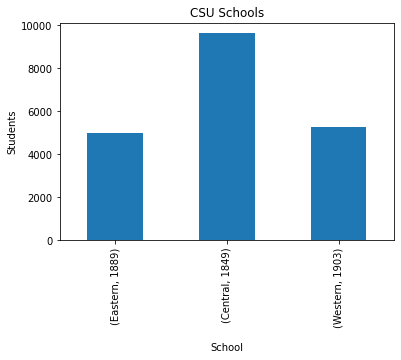

In [13]:
schoolname = []
students = []
founded = []
reqList = ["https://en.wikipedia.org/wiki/Eastern_Connecticut_State_University","https://en.wikipedia.org/wiki/Central_Connecticut_State_University","https://en.wikipedia.org/wiki/Western_Connecticut_State_University"]
i = 0
import time
import pandas as pd
while (i<3):
    time.sleep(1)
    page = requests.get(reqList[i], headers = headers)
    page
    soup = BeautifulSoup(page.content, 'html.parser')
    s1 = soup.title.string.split(" ")
    print(s1[0])
    table = soup.find('table', attrs={'class':'infobox vcard'})
    tablebd = table.find('tbody')
    td = []
    th = []
    tabletr = tablebd.find_all('tr')
    for row in tabletr:
        cols = row.find_all('th')
        if not cols:
            th.append('empty')
        else:
            cols = cols[0].text.strip()
            th.append(cols)
        cols = row.find_all('td')
        cols = cols[0].text.strip()
        td.append(cols)
    count = 0
    while(count <= len(th)):
        if th[count] == 'Established':
            break
        else:
            count+=1
        
    year = td[count].split('(')
    print(year[0], 'Year Established')
    
    while(count <= len(th)):
        if th[count] == 'Students':
            break
        else:
            count+=1
    student = td[count].split('(')
    print(student[0],'Number of Students')
    num = student[0]
    num = num.replace(',','')
    studenttemp = int(num)
    num = year[0]
    num = num.replace('xa0','')
    yeartemp = int(num)
    schooltemp = s1[0],yeartemp
    schoolname.append(schooltemp)
    students.append(studenttemp)
    
    i+=1
print(schoolname)
df= pd.DataFrame(data = {"schoolname":schoolname, "students":students })
df
plt = df.plot.bar(x = "schoolname", y = "students", 
            title = "CSU Schools",
            legend = False)

plt.set_xlabel("\nSchool")
plt.set_ylabel("Students")
None


### Question 10 <span style = 'font-size:80%'>[16 points]</span>

Selenium can be used to automate the process of signing up for a meeting or event. For example, you can use Selenium to automatically schedule office hours with me at my next available time (though this is a little tricky because you would need to log in using your Eastern credentials). In this case we consider a simpler example of using Selenium to sign up for an event on the following website:

https://www.signupgenius.com/go/8050f4facaf2da7f58-csc3011

Use Selenium to connect to this website, click the RSVP NOW button, and then do the following:

- Select Yes that you will be attending
- Select 1 for the number of people who will be attending
- Enter your first name, last name, and e-mail
- You can optionally enter a comment
- Click the RSVP Now button

Note: After clicking the first RSVP NOW button on the main page, I would start by using Selenium to enter values for the first name, last name, and e-mail inputs. These are the easiest, because these inputs can be identified by their *id*. In other cases, using *xpath* is recommended. Recall that you can use xpath to identify elements based on an attribute, following the format:

```
//tag_name[@attribute="value"]
```

For example, the following *xpath* value can be used to find a submit button (\<button type = "submit"\>):

```
//input[@type="submit"]
```

In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [15]:
from selenium.webdriver.common.action_chains import ActionChains
driver = webdriver.Firefox()
driver.get('https://www.signupgenius.com/go/8050f4facaf2da7f58-csc3011')
div = driver.find_element(By.CLASS_NAME, 'SUGbutton.rounded').click()
time.sleep(2)
div = driver.find_element(By.CLASS_NAME, 'btn-group.bootstrap-select.rsvpnumadult.form-control.inline-field.col-xs-1.ng-pristine.ng-untouched.ng-valid.ng-not-empty').click()
info_link = driver.find_element(By.XPATH, "//li[@data-original-index='1']").click()
time.sleep(1)
accept = driver.find_element(By.CLASS_NAME, 'btn.rsvpBtnGrp.btn-success').click()

info_link = driver.find_element(By.XPATH, "//input[@type='text' and @id='firstname']").click()
info_link = driver.find_element(By.XPATH, "//input[@type='text' and @id='firstname']").send_keys("James")
info_link = driver.find_element(By.XPATH, "//input[@type='text' and @id='lastname']").click()
info_link = driver.find_element(By.XPATH, "//input[@type='text' and @id='lastname']").send_keys("Conlin")
info_link = driver.find_element(By.XPATH, "//input[@type='email' and @id='email']").send_keys("conlinja@my.easternct.edu")
reset = driver.find_element(By.CLASS_NAME, 'btn.btn-lg.btn-success.ng-binding').click()
